# Qution 1:

  -  Get 1000 or more radnom users from https://random-data-api.com/documentation (Users) in json format
  - Save results about users in CSV file


In [1]:
import requests
import json
import pandas as pd
import mysql.connector as sql


base_url = "https://random-data-api.com/api/"
Users = "/users/random_user"

response_list = []

def GetUser():
    first_response = requests.get(base_url+Users)
    res=first_response.json()
    response_list.append(res)

for i in range(1,1001):
    GetUser()

    
data=[]
for response in response_list:  
    data.append({
        "id": response.get('id'),
        "uid": response.get('uid'),
        "password": response.get('password'),
        "username": response.get('username'),
        
        "first_name": response.get('first_name'),
        "last_name": response.get('last_name'),
        "avatar": response.get('avatar'),
        "gender": response.get('gender'),
        
        "email": response.get('email'),
        "phone_number": response.get('phone_number'),
        "social_insurance_number": response.get('social_insurance_number'),
        "date_of_birth": response.get('date_of_birth'),
        "title": response.get('employment').get('title'),
        "key_skill": response.get('employment').get('key_skill'),
        
        
        "city": response.get('address').get("city"),
        "street_name": response.get('address').get("street_name"),
        "street_address": response.get('address').get("street_address"),
        "zip_code": response.get('address').get("zip_code"),
        "state": response.get('address').get("state"),
        "country": response.get('address').get("country"),
        "lat": response.get('address').get("coordinates").get("lat"),
        "lng": response.get('address').get('coordinates').get("lng"),
        
        
        "cc_number": response.get('credit_card').get("cc_number"),
        "plan": response.get('subscription').get("plan"),
        "status": response.get('subscription').get("status"),
        "payment_method": response.get('subscription').get("payment_method"),
        "term": response.get('subscription').get("term")

    })
    
cnx = sql.connect(host='localhost', database='random_data', user='root', password='asderT@123')
user_df=pd.DataFrame(data)
user_df.to_csv('/root/SRE/user.csv',index=False)

# Question 2
- Read the CSV file you created in part one (first part) and load the data in the database of your choice.
- Create a query/algorithm that will find the most common user properties, and return them as a result.
- Create a query/algorithm that will find any similarities between users, that would suggest a &quot;strong&quot; or “weak (fuzzy)” connection between any 2 or more users IF that type of connection exists in the database.
- Create visualization representation of results with Matplotlib.

Create a query/algorithm that will find any similarities between users, that would suggest a "strong" or “weak (fuzzy)” connection between any 2 or more users IF that type of connection exists in the database.

Similarity between how many are engineer

select * from [dbo].[user] where title like '%Engineer%'

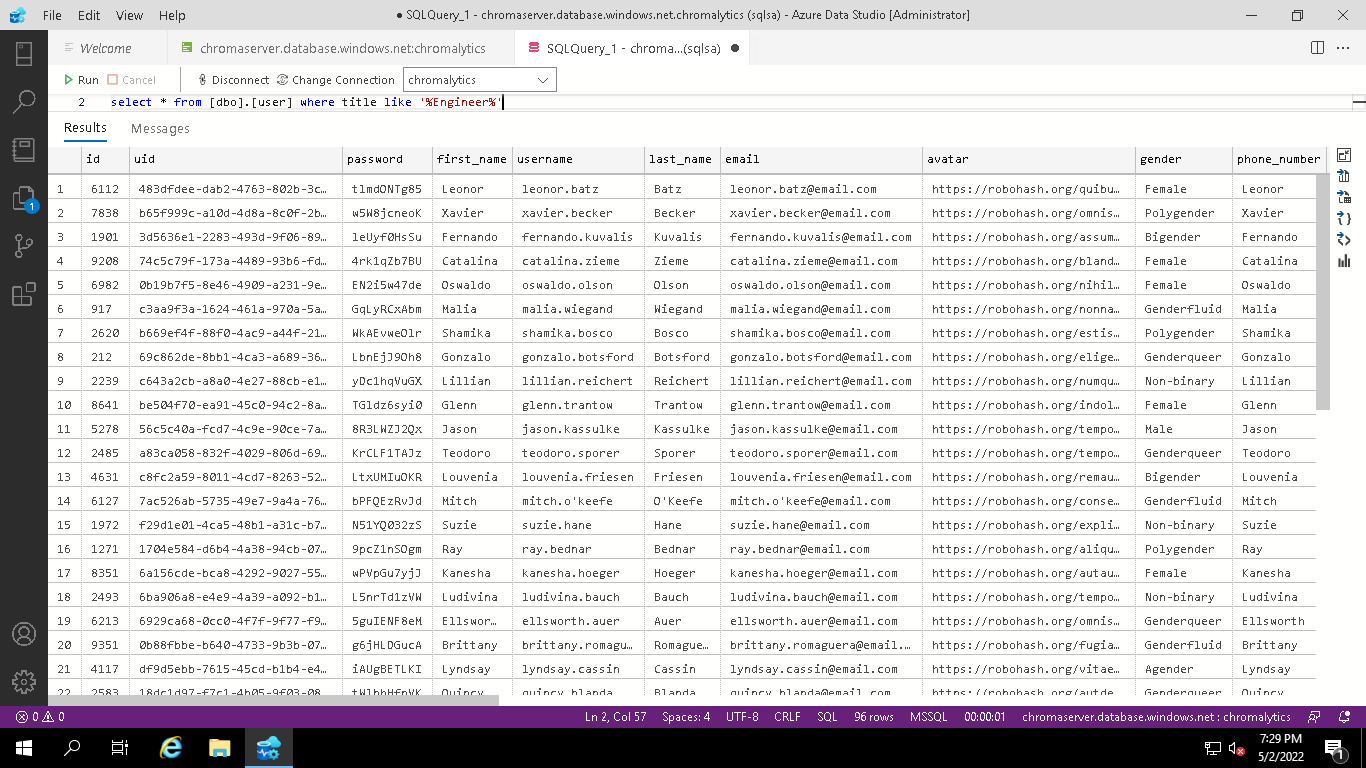

In [26]:
db_connection = sql.connect(host='localhost', database='random_data', user='root', password='asderT@123')

db_cursor = db_connection.cursor()

db_cursor = db_connection.cursor()

select_stmt = "SELECT * FROM user WHERE title LIKE '%Engineer%'"
db_cursor.execute( select_stmt)

table_rows = db_cursor.fetchall()

df = pd.DataFrame(table_rows)
display(df)



,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,5451,c820e612-4510-4498-9c44-84c78a0851aa,nRI6zu9rmP,yevette.reilly,Yevette,Reilly,https://robohash.org/atqueistefugit.png?size=3...,Male,yevette.reilly@email.com,+94 252-286-2327 x349,...,94170-9283,California,United States,-82.311200,-141.2960,4976-1619-3865-3930,Gold,Idle,Paypal,Payment in advance
1,426,3fdc563c-189c-40dd-a0a2-9eca090e187a,iNcUmRCvtJ,joan.emard,Joan,Emard,https://robohash.org/odiosapientefacere.png?si...,Male,joan.emard@email.com,+240 (335) 492-3959 x7443,...,89297,Kentucky,United States,-75.961600,-76.2517,4900743488055,Silver,Active,Alipay,Payment in advance
2,714,5dbc5fcc-7b11-440f-860b-593f25e41a5a,G0UcEV8KQu,nubia.koch,Nubia,Koch,https://robohash.org/utblanditiisdolor.png?siz...,Genderqueer,nubia.koch@email.com,+1-758 733.263.5345 x87791,...,10810,New Jersey,United States,45.200600,163.3110,4752121411617,Platinum,Pending,Debit card,Annual
3,6811,41eb8b8b-0f56-4c54-8135-6790936e6983,WKOnGhCgu6,marva.gulgowski,Marva,Gulgowski,https://robohash.org/atnesciuntet.png?size=300...,Polygender,marva.gulgowski@email.com,+291 550.246.0962 x96424,...,08273,Kentucky,United States,0.238676,90.1476,5510-8393-4211-6145,Bronze,Pending,Cheque,Monthly
4,1689,2b7c99bb-3c02-484a-ba4f-c1d3659522a1,NkDz3bgBC2,ninfa.hagenes,Ninfa,Hagenes,https://robohash.org/perspiciatisexcepturivolu...,Bigender,ninfa.hagenes@email.com,+350 926.595.5668 x37018,...,35825-7065,Georgia,United States,-37.293100,99.4511,4444-2623-3837-6520,Starter,Pending,Google Pay,Payment in advance
5,8335,9245220c-42bd-4f5c-92b7-1e78eb4d1bf7,XzN3gpBcUa,shavon.kemmer,Shavon,Kemmer,https://robohash.org/suscipitestest.png?size=3...,Bigender,shavon.kemmer@email.com,+961 1-564-537-9155,...,27202-4250,Missouri,United States,-65.082400,-156.4280,4515-1040-0455-2568,Starter,Active,Credit card,Annual
6,6404,ebc1b5b1-dade-42ca-b46a-7f9874370604,5Ib1M9zcRT,glenn.connelly,Glenn,Connelly,https://robohash.org/sapientenisiest.png?size=...,Bigender,glenn.connelly@email.com,+977 111-440-0416,...,39257-8992,Maine,United States,72.453000,18.7479,5125-3138-6892-4727,Platinum,Pending,Visa checkout,Payment in advance
7,7036,5e1f4704-df85-471b-9cf7-ee75210f2132,4FWrPc3xvX,tama.schroeder,Tama,Schroeder,https://robohash.org/doloraccusamusvitae.png?s...,Polygender,tama.schroeder@email.com,+253 (653) 126-4718 x972,...,62694,Alaska,United States,-86.057000,-58.7311,5434-4830-2394-8329,Bronze,Idle,Debit card,Annual
8,6924,424303a2-66d8-4ec1-891a-a4ea6c8d3dbb,D9L5vcszdM,verna.yundt,Verna,Yundt,https://robohash.org/cumquequisoluta.png?size=...,Non-binary,verna.yundt@email.com,+242 1-919-996-9921 x601,...,87608,Maine,United States,-72.854700,-57.8766,4198958080382,Platinum,Active,Credit card,Annual
9,9316,25f45f06-9d6b-44c6-b177-6346fb64ad1c,2OvtCKZkrz,gino.collier,Gino,Collier,https://robohash.org/reiciendisaliquidsuscipit...,Male,gino.collier@email.com,+358 325.877.2571 x303,...,86160-6826,Tennessee,United States,-9.682280,107.0460,4778-3285-5343-6244,Premium,Idle,Visa checkout,Monthly
